# Mini-projet - MDI220 Statistics

In [141]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.core.display import HTML 

## Question 1

In [142]:
df = pd.read_csv('NuclearPowerAccidents2016.csv')

In [143]:
df.head()

,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
0,4/26/1986,"Kiev, Ukraine",259336.0,7.0,8.0,EE,Mishandled reactor safety test at Chernobyl nu...,4056
1,3/11/2011,"Fukushima Prefecture, Japan",166089.0,7.0,7.5,A,An earthquake and tsunami caused emergency bac...,573
2,12/8/1995,"Tsuruga, Japan",15500.0,NaN,NaN,A,Japan's only fast breeder reactor Monju suffer...,0
3,3/28/1979,"Middletown, Pennsylvania, United States",10910.0,5.0,7.9,NaN,Equipment failure and operator error contribut...,0
4,9/11/1957,"Rocky Flats, USA",8189.0,5.0,5.2,NaN,Fire starts and destroys plutonium processing ...,0


In [144]:
df.describe()

,Cost (millions 2013US$),INES,Smyth Magnitude,Fatalities
count,175.000000,104.000000,33.000000,216.000000
mean,2892.647429,2.884615,3.293939,22.245370
std,23228.395686,1.463522,2.386412,278.570854
min,0.000000,0.000000,-2.700000,0.000000
25%,5.800000,2.000000,2.000000,0.000000
50%,37.500000,3.000000,3.200000,0.000000
75%,157.400000,4.000000,4.300000,0.000000
max,259336.000000,7.000000,8.000000,4056.000000


In [145]:
df.columns

Index(['Date', 'Location', 'Cost (millions 2013US$)', 'INES',
       'Smyth Magnitude', 'Region', 'Description', 'Fatalities'],
      dtype='object')

In [146]:
#On retire les lignes où le coût est vide
df = df.dropna(subset=['Cost (millions 2013US$)'])

In [147]:
#On commence par convertir les dates, qui sont de type "string", en date que Python pourra reconnaître
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, format="%m/%d/%Y")

In [148]:
#Puis on filtre le dataset par rapport à la date de l'incident, le 28/03/1979
df = df[df['Date'] < '1979-03-28']

In [149]:
#On vérifie l'information donnée par l'énoncé : il nous reste bien 55 observations
df.shape

(55, 8)

In [150]:
#On ne conserve que la colonne des dates pour la suite :

In [151]:
X = df['Cost (millions 2013US$)']
X

4      8189.0
5      4400.0
6      3500.0
7      2900.0
8      2500.0
10     1964.5
11     1900.0
12     1733.4
13     1500.0
14     1330.0
15     1300.0
17     1100.0
18     1100.0
21      990.0
24      800.0
25      793.9
26      788.4
29      541.4
30      511.5
33      425.2
38      277.1
41      180.0
44      150.0
52      100.0
53      100.0
54       99.5
55       98.0
56       89.9
58       87.7
60       84.5
62       77.0
70       60.1
73       52.4
86       38.0
87       37.5
95       25.7
96       25.7
101      17.1
103      16.1
106      15.0
108      13.9
115      11.8
121      11.4
130       6.1
135       4.4
157       1.2
158       1.1
161       0.0
162       0.0
163       0.0
164       0.0
165       0.0
166       0.0
167       0.0
168       0.0
Name: Cost (millions 2013US$), dtype: float64

## Question 2

A/ Fonction quantile d'une loi normale

In [152]:
Image(url="https://i.ibb.co/hLLFSm6/2a.png", width=1000)

B/ Tracé d'un diagramme Quantile-Quantile (QQ-plot) pour la loi normale

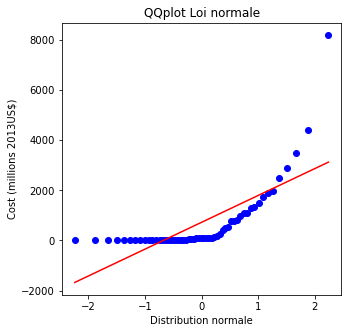

In [153]:
plt.figure(figsize=(5,5))
stats.probplot(X, fit=True, plot=plt)
plt.title('QQplot Loi normale')
plt.ylabel('Cost (millions 2013US$)')
plt.xlabel('Distribution normale')
plt.show()

### Quesiton 3

A/ Fonction quantile d'une loi exponentielle

In [154]:
Image(url="https://i.ibb.co/LQM6SLZ/3a.png", width=1000)

B/ QQPlot des données pour une loi exponentielle

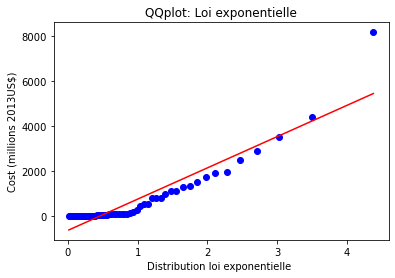

In [155]:
stats.probplot(X, dist='expon',fit=True,plot=plt)
plt.title('QQplot: Loi exponentielle')
plt.ylabel('Cost (millions 2013US$)')
plt.xlabel('Distribution loi exponentielle ')
plt.show()

### Question 4

Le QQPlot permet de voir graphiquement si deux jeux de données ont une distribution aléatoire commune (on compare ainsi un modèle 'classique' et un jeu de données étudié) : si la série statistique suit bien le modèle auquel elle est comparée, les quantiles observés devraient être égaux aux quantiles du modèle statistique, à une transformation affine près.

Dans notre cas, on voit que le résultat obtenu est meilleur (les points sont plus proches de la droite affine) pour la loi exponentielle que pour la loi normale.
Donc la loi exponentielle semble être la plus plausible.

## Exercice 2

1/ Estimateur du maximum de vraisemblance

In [156]:
Image(url="https://i.ibb.co/qyyS4RJ/21.png",width=1000)

2/ Tracer : histogramme des données et densité de probabilité de la loi exponentielle de paramètre l'estimateur de vraisemblance précédemment trouvé

/Users/lucashommet/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


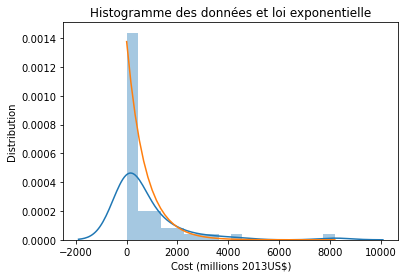

In [157]:
#calcul de lambda et de la loi exponentielle
l = 1/statistics.mean(X)

x = np.linspace(0,X.max())
Y = l*np.exp(-l*x)

#Tracé
sns.distplot(X,label ="données") # Tracé de l'histogramme
plt.plot(x,Y,label="Loi exponentielle") #Tracé de la loi exponentielle
plt.xlabel('Cost (millions 2013US$)')
plt.ylabel('Distribution')
plt.title("Histogramme des données et loi exponentielle")
plt.show()

3/ Estimateur efficace

In [158]:
Image(url='https://i.ibb.co/w0GCTwH/partA.png',width=1000)

In [159]:
Image(url="https://i.ibb.co/ZKwXHcx/partB.png",width=1000)

4/ Calcul de T1

In [160]:
t1 = statistics.mean(X)
print(t1)

726.3363636363637


5/ Nouvel estimateur

In [161]:
Image(url="https://i.ibb.co/6B1MWFn/r.png",width=1000)

6/


La médiane vaut (après calcul) log(2)/λ
On prend donc **η= ln(2)**, et l'estimateur T1, η est alors l’estimateur sans biais de la médiane

In [162]:
T1=(np.log(2)*X.sum()/X.count())
print("Médiane trouvée par l’estimateur : ", T1)
print("Médiane empirique: ", X.median())

Médiane trouvée par l’estimateur :  503.4580025927086
Médiane empirique:  89.9


7/

On prend à nouveau η= ln(2)

<blockquote>
    
\begin{align}
R(\lambda,T_1) & = \frac{1}{n\lambda^2}
\end{align}

\begin{align}
R(\lambda,T_{1,\eta}) & = \frac{ n(log(2) - 1)^2 + log(2)^2 }{n\lambda^2}
\end{align}

</blockquote>

<blockquote>

On a vu que tant que log(2) > (n-1)/(n+1) alors T<sub>1, η</sub>  a un risque inférieur à T<sub>1</sub> 
</blockquote>

## Exercice 3

1/

In [163]:
Image(url='https://i.ibb.co/9ZpDrVg/1.png',width = 1000)

2/

In [172]:
Image(url='https://i.ibb.co/PMFc7jJ/q22.png',width = 1000)

3/

In [165]:
p_val = stats.gamma.cdf(x=X.sum(),a=X.size, scale=1000)
print("p-valeur = ",p_val)

p-valeur =  0.013717486423264914


<blockquote>Cette p-valeur est inférieure au α que nous nous sommes donnés. Donc nous pouvons rejeter H<sub>0</sub> : le coût moyen d’accident est inférieur à un milliard de dollars</blockquote>

4/

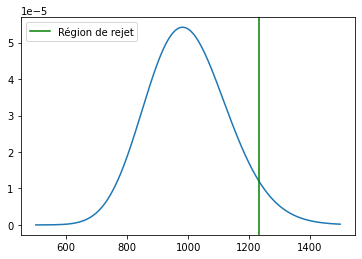

Point critique :  1231.6379811669046


In [166]:
g=stats.gamma(a=X.size, scale=1000)
plt.plot(np.arange(500,1500),g.pdf(x=np.arange(500*55,1500*55,55)))
plt.axvline(g.ppf(1-0.05)/55,color='g',label="Région de rejet")
plt.legend()
plt.show()
print("Point critique : ",g.ppf(1-0.05)/55)

<blockquote>
Précision : la région de rejet est à droite de la ligne verte.
</blockquote>

5/

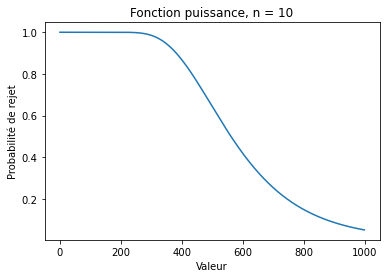

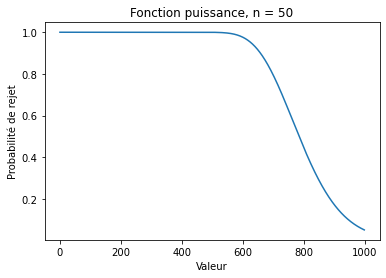

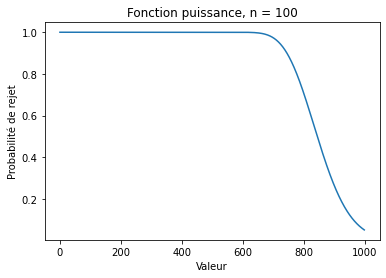

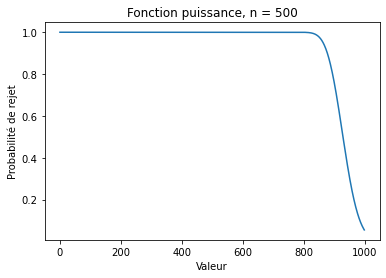

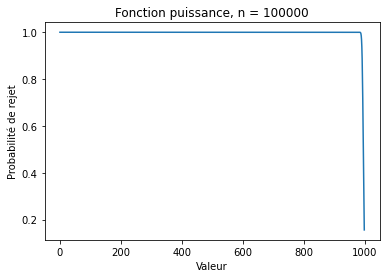

In [167]:
N=[10, 50, 100, 500, 100000]
for n in N:
    gamma=stats.gamma(a=n, scale=1000)
    pui=[]
    for i in range(1,999):
        a = stats.gamma.cdf(x=gamma.ppf(0.05),a=n, scale=i)
        pui.append(a)
    puissance=np.array(pui)
    plt.title("Fonction puissance, n = "+ str(n))
    plt.xlabel("Valeur")
    plt.ylabel("Probabilité de rejet")
    plt.plot(np.arange(1,999),puissance)
    plt.show()

<blockquote>On remarque que : plus l'échantillon est de taille importante, plus la puissance du test augmente. 
<br>Pour influer sur la puissance du test (ce qu'on ne fait pas directement dans l'approche de Neyman-Pearson, on peut donc penser à considérer un échantillon plus grand.</blockquote>

6/

<blockquote>
D'après le théorème de la limite centrée, et comme les XI sont iid, on a que : <br>

In [173]:
Image(url='https://i.ibb.co/0D9CfPZ/q66.png', width = 1000)

<blockquote>
On peut proposer un nouveau test qui utiliserait ce même principe du théorème de la limite centrée : utiliser l'approximation de la loi gamma par une loi gaussienne au lieu de raisonner sur des lois Gamma
</blockquote>

In [169]:
Image(url='', width = 1000)

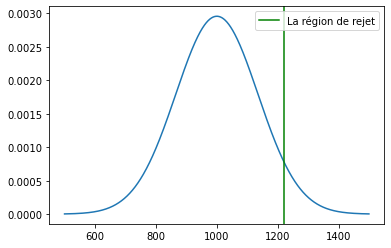

In [170]:
n=stats.norm.pdf(x=np.arange(500,1500), loc=1000, scale=1/math.sqrt(55)*1000)
plt.plot(np.arange(500,1500),n)
plt.axvline(stats.norm.ppf(0.95,loc=1000,scale=1000/math.sqrt(55) ),color='g',label="La région de rejet")
plt.legend(loc="upper right")
plt.show()

In [174]:
#On calcule la p valeur

p_val = stats.norm.cdf(X.sum()/55 , loc=1000, scale=1000/math.sqrt(55))
print("p-valeur = ",p_val)

p-valeur =  0.021201463906399154


Comme nous pouvons le voir ci-dessus, nous continuons à rejeter H0, nous pouvons donc continuer à dire que le coût moyen est inférieur à 1 milliard.